# Phân loại bệnh tiểu đường (Pima Indians Diabetes Dataset)

## 1. Định nghĩa vấn đề (Define Problem)

+ **Mô tả**:  
    + Bộ dữ liệu Pima Indians Diabetes chứa thông tin y tế của phụ nữ gốc Pima Indian từ 21 tuổi trở lên.  
    + Dữ liệu này thường được sử dụng để dự đoán khả năng mắc bệnh tiểu đường dựa trên các chỉ số sức khỏe.  

+ **Dữ liệu vào**:  
    + Pregnancies: số lần mang thai  
    + Glucose: nồng độ glucose huyết tương sau 2 giờ trong xét nghiệm dung nạp glucose  
    + BloodPressure: huyết áp tâm trương (mm Hg)  
    + SkinThickness: độ dày nếp gấp da ở cơ tam đầu (mm)  
    + Insulin: nồng độ insulin huyết thanh 2 giờ (mu U/ml)  
    + BMI: chỉ số khối cơ thể (cân nặng tính bằng kg / (chiều cao tính bằng m)^2)  
    + DiabetesPedigreeFunction: điểm số phả hệ tiểu đường  
    + Age: tuổi (năm)

+ **Kết quả**:  
    + Outcome (0: Không mắc tiểu đường, 1: Mắc tiểu đường)


## 2. Chuẩn bị vấn đề (Prepare Problem)

### 2.1. Khai báo thư viện (Load Libraries)

In [1]:
# Load libraries
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings

%matplotlib inline
# plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings("ignore")

### 2.2. Nạp dữ liệu (Load Dataset)


In [2]:
# Đọc dữ liệu
columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin",
           "BMI","DiabetesPedigreeFunction","Age","Outcome"]
df = pd.read_csv('pima-indians-diabetes.csv', header=None, names=columns)



## 3. Phân tích dữ liệu (Analyze Data)

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [3]:
# shape
print(f'+ Shape: {df.shape}')
# types
print(f'+ Data Types: \n{df.dtypes}')
# head, tail
print(f'+ Contents: ')
display.display(df.head(5))
display.display(df.tail(5))
# info
df.info()

+ Shape: (768, 9)
+ Data Types: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
+ Contents: 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Nhận xét**:
+ Dữ liệu có 8 đặc trưng để phân lớp: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age.
+ Các giá trị của 8 đặc trưng này chủ yếu là số đo y tế (một số tính theo mm Hg, một số tính theo mm, một số là chỉ số).
+ Tổng số dòng dữ liệu là 768 dòng.
+ Nhãn phân lớp nằm ở cột **Outcome** (0: không mắc tiểu đường, 1: mắc tiểu đường).


#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [4]:
has_null = df.isnull().sum().any()
has_nan  = df.isna().sum().any()
n_duplicated = df.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df[df.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df[df.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')
if n_duplicated>0:
    s_query1 = "`sepal-length`==4.9 and `sepal-width`==3.1 and `class`=='Iris-setosa'"
    s_query2 = "`sepal-length`==5.8 and `sepal-width`==2.7 and `class`=='Iris-virginica'"
    display.display(df.query(s_query1))
    display.display(df.query(s_query2))
    display.display(df[df.duplicated()])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 0


**Nhận xét**:
+ Dữ liệu không có dòng bị trùng 
+ Dữ liệu không có giá trị rỗng (NaN, Null)

#### (3) **Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [5]:
description = df.describe().T
display.display(description)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Nhận xét**:
+ Phần lớn các biến là số đo y tế, không cùng đơn vị đo.  
+ Giá trị trung bình (mean) của một số biến:
  - Pregnancies: trung bình 3,8 lần mang thai (0–17).  
  - Glucose: trung bình 120 mg/dL (0–199).  
  - BloodPressure: trung bình 69 mmHg (0–122).  
  - BMI: trung bình 32 (0–67.1).  
  - Age: trung bình 33 tuổi (21–81).  
+ Tỷ lệ bệnh nhân có Outcome = 1 (mắc tiểu đường) khoảng 34,9% và Outcome = 0 (không mắc) khoảng 65,1%.

#### (4) **Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Outcome) và dữ liệu danh mục (Category)**

Đối với bài toán phân lớp (classification problem), chúng ta cần tính số lần xuất hiện của thuộc tính phân lớp. Điều này là cần thiết cho vấn đề mất cân bằng (highly imbalanced problems) giữa các lớp nhằm cần xử lý đặc biệt trong bước chuẩn bị dữ liệu.

In [6]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

**Nhận xét**:
+ Dữ liệu cần phân loại thành 2 lớp:  
  - 0: Không mắc tiểu đường  
  - 1: Mắc tiểu đường  
+ Số lượng mẫu của hai lớp không cân bằng:  
  - Lớp 0 có 500 mẫu  
  - Lớp 1 có 268 mẫu  


#### (5) **Mối tương quan giữa các tính chất (Correlations)**

Sự tương quan (correlation) đề cập đến mối quan hệ giữa hai biến và cách chúng có thể có hoặc không cùng nhau thay đổi.

Phương pháp phổ biến nhất để tính toán tương quan là Pearson's Correlation Coeficient, giả định có một phân phối chuẩn của các thuộc tính liên quan. Tương quan -1 hoặc 1 cho thấy mối tương quan âm hoặc dương đầy đủ tương ứng. Trong khi giá trị 0 hiển thị không tương quan ở tất cả. 

$$
r = \frac{\sum_{i=1}^n{\left(x_i - \hat{x}\right)\left(y_i - \hat{y}\right)}}{\sqrt{\sum_{i=1}^n{\left(x_i - \hat{x}\right)^2}\sum_{i=1}^n{\left(y_i - \hat{y}\right)^2}}}
$$

Một số thuật toán học máy như hồi quy tuyến tính và logistic có hiệu suất kém nếu có các thuộc tính tương quan cao trong tập dữ liệu của bạn. 

Như vậy, thật sự cần thiết để xem xét tất cả các mối tương quan theo cặp của các thuộc tính trong tập dữ liệu.

In [7]:
correlations = df.corr(method='pearson')
display.display(correlations)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Nhận xét**:
+ Các cặp tính chất có độ tương đồng cao:
    + (Pregnancies, Age) = 0.544
    + (SkinThickness, Insulin) = 0.437
    + (SkinThickness, BMI) = 0.393
    + (Glucose, Insulin) = 0.331 → Người có mức glucose cao cũng thường có insulin cao.
+ Các biến có tương quan đáng kể với Outcome (mục tiêu):
    + (Glucose, Outcome) = 0.467 → Nồng độ glucose cao là dấu hiệu quan trọng của bệnh tiểu đường.
    + (BMI, Outcome) = 0.293 → Chỉ số BMI cao tăng khả năng mắc bệnh.
    + (Age, Outcome) = 0.238 → Tuổi lớn hơn dễ mắc bệnh.
    + (Pregnancies, Outcome) = 0.222 → Số lần mang thai nhiều hơn tăng nguy cơ.
    + Các cặp còn lại có tương quan thấp (|corr| < 0.2), ít ảnh hưởng lẫn nhau.

### 3.2. Hiển thị dữ liệu (Visualize Data)

#### (1) Hiển thị trên từng tính chất đơn (Univariate Plots)

**Box and whisker plots**
+ So sánh các trung vị (median) tương ứng của mỗi ô hộp (box plot). Nếu đường trung vị của một ô hộp nằm bên ngoài ô của một ô hộp so sánh, thì có thể có sự khác biệt giữa hai nhóm.
+ So sánh chiều dài hộp để kiểm tra cách dữ liệu được phân tán giữa mỗi mẫu. Hộp càng dài thì dữ liệu càng phân tán. Dữ liệu càng nhỏ càng ít bị phân tán.
+ Một ngoại lệ (outlier) được định nghĩa là một điểm dữ liệu nằm bên ngoài phần rìa (whiskers) của ô hộp.
+ Kiểm tra hướng lệch của dữ liệu (cân đối, các phần tử tập trung trái, phải).
    + Median ở giữa hộp và râu (whiskers) ở hai bên như nhau thì phân bố là đối xứng.
    + Median ở gần đáy hộp hơn và nếu râu ngắn hơn ở đầu dưới của hộp, thì phân phối là lệch dương (lệch phải).
    + Median ở gần đầu hộp hơn và nếu râu ngắn hơn ở đầu trên của hộp, thì phân bố bị lệch âm (lệch trái).

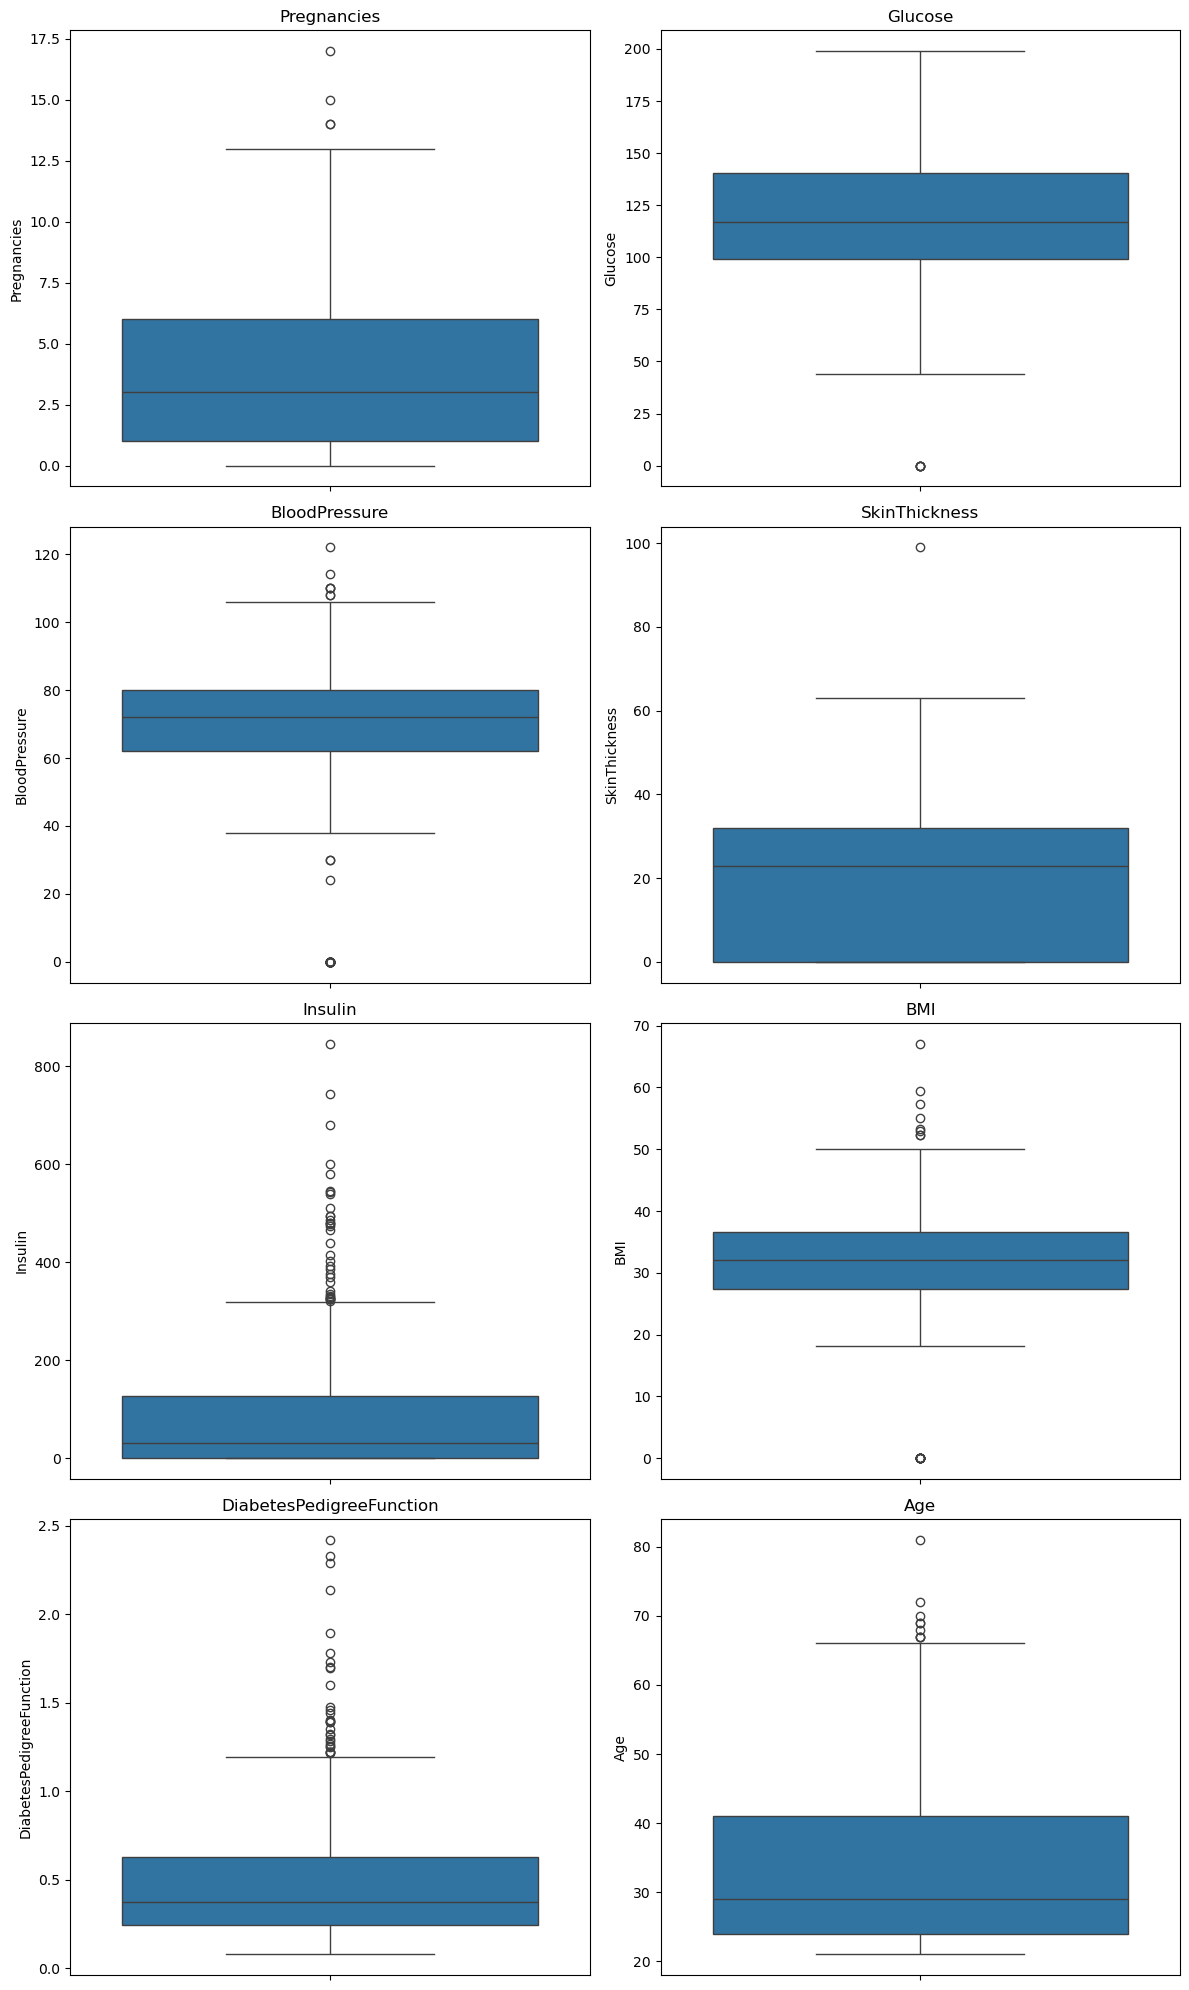

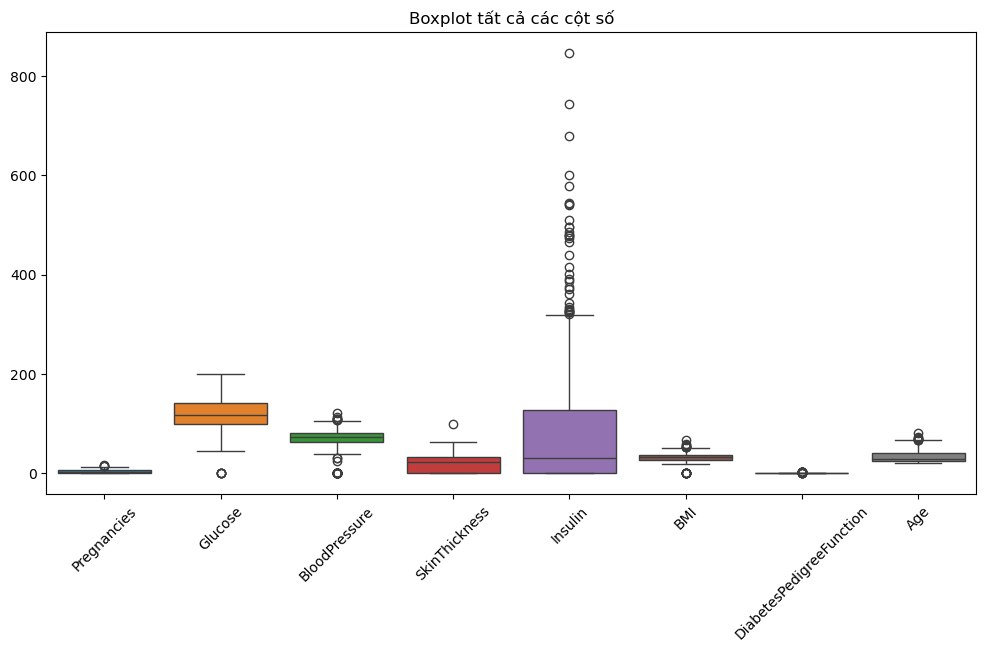

In [8]:
cols = df.columns[:-1] 
n_cols = 2
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5*n_rows))
axes = np.array(axes).reshape(n_rows, n_cols)  

for i, col in enumerate(cols):
    r = i // n_cols
    c = i % n_cols
    sns.boxplot(y=df[col], ax=axes[r, c])
    axes[r, c].set_title(col)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df[cols])
plt.title("Boxplot tất cả các cột số")
plt.xticks(rotation=45)  # xoay tên cột cho dễ đọc
plt.show()

**Nhận Xét**
+ Độ trải rộng giữa các tính chất số khá khác nhau: Pregnancies, Age có độ trải rộng vừa phải, trong khi Insulin, SkinThickness trải rộng lớn và có nhiều outlier.
+ Một số cột như Glucose, BMI có phân bố lệch về phía giá trị cao, nghĩa là nhiều giá trị tập trung ở mức thấp nhưng vẫn có vài giá trị lớn.
+ Các cột như Pregnancies, BloodPressure có phân bố giá trị khá cân bằng, median nằm gần giữa IQR, ít lệch.
+ Insulin và SkinThickness có nhiều outlier, cho thấy dữ liệu không đồng đều và cần chú ý khi phân tích hoặc đưa vào mô hình.

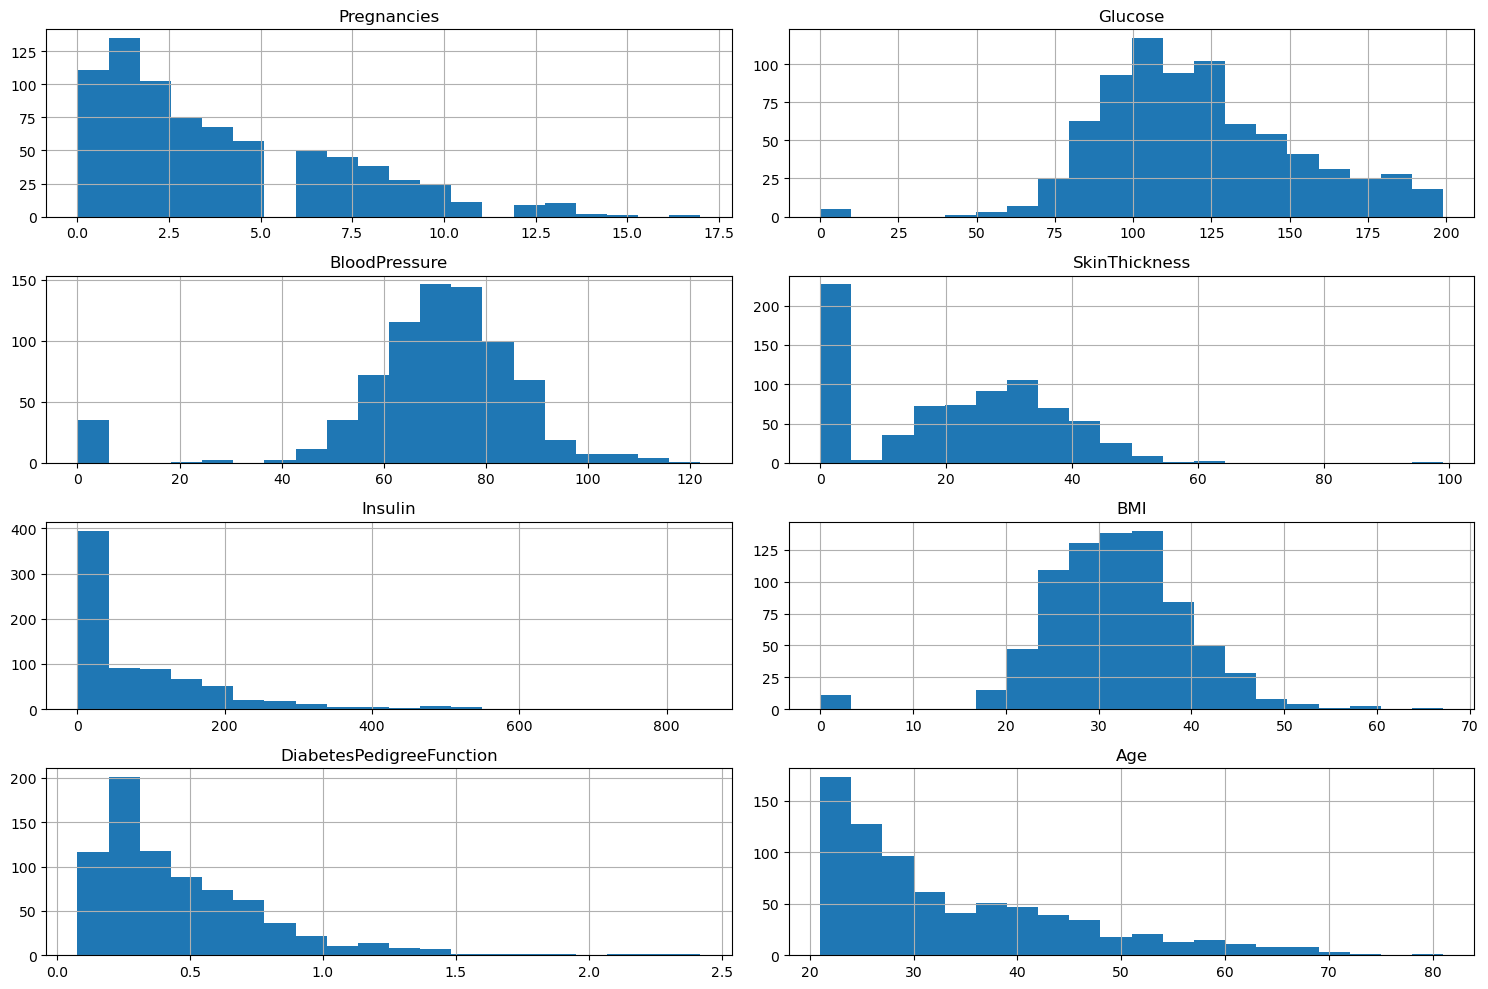

In [9]:
features = df.drop('Outcome', axis=1)
features.hist(bins=20, figsize=(15, 10), layout=(4, 2))
plt.tight_layout()
plt.show()

#### (2) Hiển thị nhiều tính chất (Multivariate Plots)

In [10]:
pd.plotting.scatter_matrix(df, figsize=(20,15))

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

+ Mối quan hệ giữa các biến:
    + Glucose – Insulin: Có mối tương quan dương nhẹ, nhưng nhiều điểm ngoại lai.
    + BMI – Age: Có sự lan tỏa nhẹ, không quá rõ ràng.
    + Pregnancies – Age: Tương quan dương nhẹ, phụ nữ lớn tuổi thường có nhiều lần mang thai hơn.
    + Các biến về sức khỏe khác (BloodPressure, SkinThickness, DiabetesPedigreeFunction) với Glucose và BMI: Không thấy mối quan hệ tuyến tính mạnh, các điểm khá phân tán

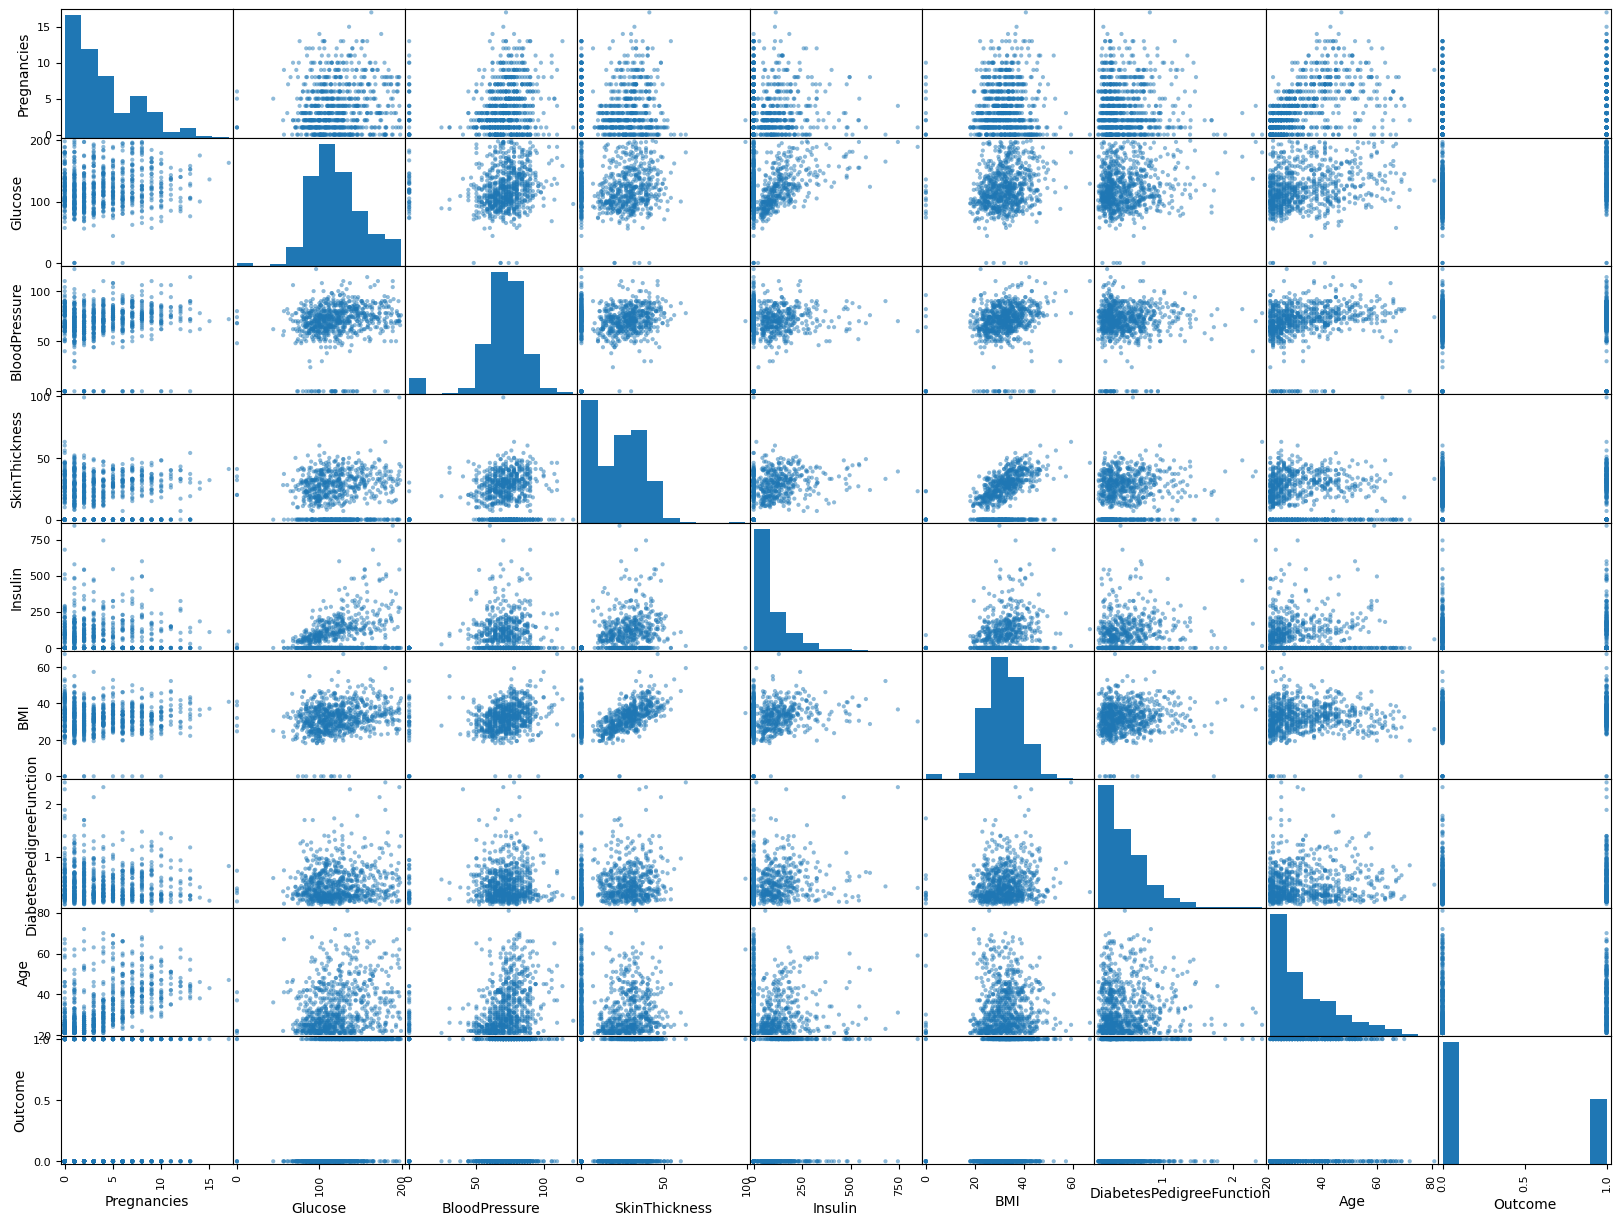

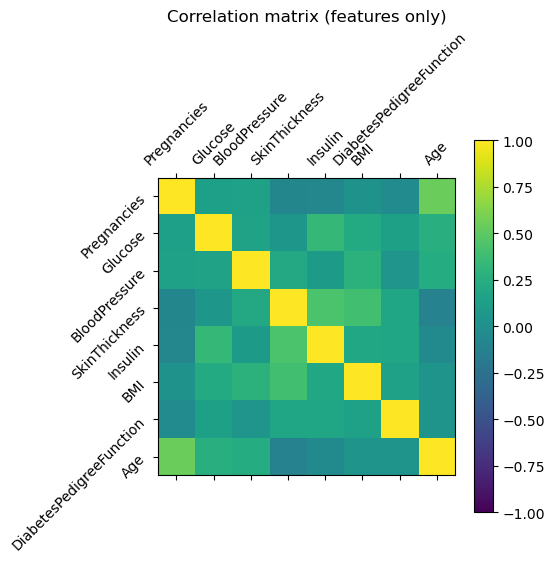

In [11]:
plt.matshow(correlations.iloc[:-1, :-1], vmin=-1, vmax=1)
plt.colorbar()
num_features = len(df.columns) - 1  # exclude 'Outcome'
plt.xticks(np.arange(num_features), list(df.columns[:-1]), rotation=45)
plt.yticks(np.arange(num_features), list(df.columns[:-1]), rotation=45)
plt.title("Correlation matrix (features only)")
plt.show()

## 4. Chuẩn bị dữ liệu (Prepare Data)

### 4.1. Làm sạch dữ liệu (Data Cleaning)

#### (1) **Tạo bảng dữ liệu làm sạch**
+ Chỉ giữ lại các cột Input, Ouput

In [12]:
df_clean = df.copy()

#### (2) **Xóa dữ liệu trùng nhau**

In [13]:
display.display(df_clean[df_clean.duplicated()])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


#### (3) **Xử lý giá trị rỗng, không hợp lệ**

In [14]:
has_null = df_clean.isnull().sum().any()
has_nan  = df_clean.isna().sum().any()
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_clean[df_clean.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_clean[df_clean.isna().any(axis=1)])

+ Có giá trị Null: False
+ Có giá trị Nan: False


##### Example
Nếu có dữ liệu Null, hay Nan thì chúng ta có các cách giải quyết sau:
+ Chúng ta xóa bỏ cột tính chất vi phạm: 

```python
df_clean.drop("cột_vi_phạm", axis=1)
```
+ Chúng ta xóa bỏ các dòng vi phạm: 

```python
df_clean.dropna(subset=["cột_vi_phạm", ...])
```

+ Điền giá trị hằng số (như số 0), hoặc nội suy bằng phần tử median:

```python
median = df_clean["cột_vi_phạm"].median()
df_clean["cột_vi_phạm"].fillna(median, inplace=True)
```

### 4.2. Biến đổi dữ liệu (Data Transforms)

#### (1) Chuyển đổi dữ liệu danh mục (Category) thành dữ liệu số

+ Vì muc Outcome đã có định dạng dữ liệu số nên bỏ qua bước này

#### (2) Chuyển đổi dữ liệu danh mục (Category) thành dạng OneHot

Một số thuật toán khi chuyển đổi cột dạng danh mục thành kiểu OneHot thì cho hiệu suất cao hơn. 

Bên cạnh đó, khi huấn luyện mô hình với dạng hàm mất mát CategoryEntropy thì cũng cần chuyển thuộc tính phân lớp sang dạng OneHot.

+ Vì muc Outcome đã có định số là 0 và 1 nên bỏ qua bước này

#### (3) Chuẩn hóa dữ liệu (Data Normalize)

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán

In [15]:
# Min-Max Normalization
scale_columns = cols
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_clean[scale_columns])
df_clean_minmax = df_clean.copy()
df_clean_minmax[scale_columns] = minmax_scaler.transform(df_clean[scale_columns])
df_clean_minmax

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [16]:
df_clean_minmax[scale_columns].plot(kind="box", figsize=(12,6))

<Axes: >

In [17]:
# Standard Normalization
standard_scaler = StandardScaler()
standard_scaler.fit(df_clean[scale_columns])
df_clean_standard = df_clean.copy()
df_clean_standard[scale_columns] = standard_scaler.transform(df_clean[scale_columns])
df_clean_standard

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


In [18]:
df_clean_standard[scale_columns].plot(kind="box", figsize=(12,6))

<Axes: >

In [19]:
correlations = df_clean_standard.corr(method='pearson')
display.display(correlations)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### (4) Chia dữ liệu thực nghiệm

+ Chuyển đổi dữ liệu sang dạng numpy với phần Input (X_data), Output (y_data)
+ Chia dữ liệu thành tập train/test (tỷ lệ 70/30)
+ Lưu tất cả thông tin để chuẩn bị chạy thuật toán

In [20]:
X_data, y_data = df_clean.values[:, :-1], df_clean.values[:, -1]
X_data.shape, y_data.shape
print(X_data[:20, :])
print(y_data[:20])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]
 [5.000e+00 1.160e+02 7.400e+01 0.000e+00 0.000e+00 2.560e+01 2.010e-01
  3.000e+01]
 [3.000e+00 7.800e+01 5.000e+01 3.200e+01 8.800e+01 3.100e+01 2.480e-01
  2.600e+01]
 [1.000e+01 1.150e+02 0.000e+00 0.000e+00 0.000e+00 3.530e+01 1.340e-01
  2.900e+01]
 [2.000e+00 1.970e+02 7.000e+01 4.500e+01 5.430e+02 3.050e+01 1.580e-01
  5.300e+01]
 [8.000e+00 1.250e+02 9.600e+01 0.000e+00 0.000e+00 0.000e+00 2.320e-01
  5.400e+01]
 [4.000e+00 1.100e+02 9.200e+01 0.000e+00 0.000e+00 3.760e+01 1.910e-01
  3.000e+01]
 [1.000e+01 1.680e+02 7.400e+01 0.000e+00 0.000e+00 3.800e+01 5.3

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.7)
print(f'+ Train/Test: Train Ratio = {len(X_train)/len(X_data)}')
print(f'+ Train: shape={X_train.shape}\nInput = \n{X_train[:5]}\nOutput = {y_train[:5]}')
print(f'+ Test: shape={X_test.shape}\nInput = \n{X_test[:5]}\nOutput = {y_test[:5]}')


+ Train/Test: Train Ratio = 0.69921875
+ Train: shape=(537, 8)
Input = 
[[ 11.    136.     84.     35.    130.     28.3     0.26   42.   ]
 [  3.    174.     58.     22.    194.     32.9     0.593  36.   ]
 [  2.     99.     52.     15.     94.     24.6     0.637  21.   ]
 [  2.     89.     90.     30.      0.     33.5     0.292  42.   ]
 [  2.    112.     66.     22.      0.     25.      0.307  24.   ]]
Output = [1. 1. 0. 0. 0.]
+ Test: shape=(231, 8)
Input = 
[[  5.    130.     82.      0.      0.     39.1     0.956  37.   ]
 [  0.     93.    100.     39.     72.     43.4     1.021  35.   ]
 [  7.    181.     84.     21.    192.     35.9     0.586  51.   ]
 [ 10.     94.     72.     18.      0.     23.1     0.595  56.   ]
 [  1.    193.     50.     16.    375.     25.9     0.655  24.   ]]
Output = [1. 0. 1. 0. 0.]


In [22]:
# Lưu thông tin
save_dir = "exps/diabetes"
if os.path.exists(save_dir) == False: os.makedirs(save_dir)

# Save training data
np.savez(f'{save_dir}/data.npz', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
# Save cleaning data
df_clean.to_excel(f'{save_dir}/df_clean.xlsx', index=False)
# Save encoders
outcome_encoder = LabelEncoder()
outcome_encoder.fit(df_clean["Outcome"])
outcome_encoder.classes_ = np.array(["khong benh", "co benh"]) # Ma hóa lại tên lớp
joblib.dump(outcome_encoder, f'{save_dir}/outcome_encoder.joblib')


os.listdir(save_dir)

['data.npz', 'df_clean.xlsx', 'outcome_encoder.joblib']

In [23]:
# Kiểm tra phục hồi dữ liệu
dict(np.load(f'{save_dir}/data.npz')).keys()

dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])

In [24]:
pd.read_excel(f'{save_dir}/df_clean.xlsx')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [25]:
joblib.load(f'{save_dir}/outcome_encoder.joblib').classes_

array(['khong benh', 'co benh'], dtype='<U10')

# Kết thúc